<h1 style = "font-size:3rem;color:orange">Examen 2023_1</h1>

Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

In [11]:
# Librerías
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif, SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#### 1) Partición de datos externa (1.5 puntos)

Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobar si los datos, tanto de train como de test, están balanceados.

In [4]:
# Cargar base de datos
data_load = np.load('dataset_exam.npy')

print("Base de datos:\n")
print(np.shape(data_load))
print(data_load)

# Separamos los atributos de la clase
X = data_load[:, :-1]
y = data_load[:, -1]

print("\nAtributos y clase:\n")
print("X:", X)
print("y:", y)

# Realizamos la partición tipo hold-out (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensiones de las particiones:\n")
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

# Comprobar datos balanceados
labels_train, count_label_train = np.unique(y_train, return_counts=True)
labels_test, count_label_test = np.unique(y_test, return_counts=True)

print("\nComprobar datos balanceados de test:\n")
print("Etiquetas de entrenamiento:", labels_train, "Veces que se repiten:", count_label_train)
print("Etiquetas de test:", labels_test, "Veces que se repiten:", count_label_test)

Base de datos:

(492, 9)
[[ 0.          4.          1.         ...  8.2603626   7.37490176
   0.        ]
 [ 0.          4.          0.         ... 10.9370737  10.30131004
   0.        ]
 [ 0.          3.          1.         ... 10.69134847 11.45671439
   0.        ]
 ...
 [ 0.          2.          0.         ...  1.94458971  8.88390924
   0.        ]
 [ 0.          3.          2.         ...  1.92895933  9.03304966
   1.        ]
 [ 0.          4.          0.         ...  2.0478487   8.86096477
   0.        ]]

Atributos y clase:

X: [[ 0.          4.          1.         ...  9.04481012  8.2603626
   7.37490176]
 [ 0.          4.          0.         ...  8.56908202 10.9370737
  10.30131004]
 [ 0.          3.          1.         ...  9.68777842 10.69134847
  11.45671439]
 ...
 [ 0.          2.          0.         ...  2.95882711  1.94458971
   8.88390924]
 [ 0.          3.          2.         ...  2.95542398  1.92895933
   9.03304966]
 [ 0.          4.          0.         ...  2.949283

#### 2) Estandarización de los datos de train y test (1.5 puntos)

Utilizar el método StandardScaler().

In [5]:
# Cargamos el estandarizador
standarizer = preprocessing.StandardScaler()

# Entrenamos el modelo con los datos de entrenamiento
standarizer_X_train = standarizer.fit(X_train)

# Aplicamos el modelo a los datos de entrenamiento y test
X_train_std = standarizer.transform(X_train)
X_test_std = standarizer.transform(X_test)

print("Datos estandarizados\n")
print("Atributos entrenamiento:", X_train_std)
print("\nAtributos test:", X_test_std)

Datos estandarizados

Atributos entrenamiento: [[-0.53714485 -0.41701989 -0.37232487 ... -0.54017298 -1.96779643
  -2.17643457]
 [ 1.86169522 -0.41701989 -1.25913502 ...  0.33529217  0.47045818
   0.57704227]
 [-0.53714485  0.63354944 -0.37232487 ... -2.29090328 -0.78155436
  -2.19168937]
 ...
 [-0.53714485  0.63354944  0.51448528 ... -0.05463725  1.59610944
   0.46205349]
 [-0.53714485  0.63354944 -0.37232487 ... -2.27896303 -0.74796736
  -2.20956336]
 [-0.53714485 -0.41701989 -1.25913502 ...  0.21936805  0.56915869
  -0.02527913]]

Atributos test: [[-5.37144850e-01  6.33549445e-01 -3.72324871e-01 -1.90831500e+00
   2.67719761e+00  5.93471266e-02  3.44639546e-01 -4.78182436e-02]
 [-5.37144850e-01 -4.17019888e-01  2.28810557e+00 -4.24699184e-01
  -1.79618105e+00  7.36312576e-01  5.27014657e-01  6.63202575e-01]
 [ 1.86169522e+00  6.33549445e-01 -3.72324871e-01  3.17108724e-01
  -6.82958574e-03 -2.84062367e-01  3.16703050e-01  4.62053486e-01]
 [-5.37144850e-01  6.33549445e-01 -3.72324871

#### 3) Selección de atributos en train y test (1.5 puntos)

Aplicar el método de información mutua para clasificación en el percentile 90.

In [6]:
# Calcular la información mutua entre características y la variable objetivo
selector = SelectPercentile(score_func=mutual_info_classif, percentile=90)

selector.fit(X_train_std, y_train)

X_train_selected = selector.transform(X_train_std)
X_test_selected = selector.transform(X_test_std)

print(X_train_selected)
print(X_test_selected)

[[-0.53714485 -0.37232487 -0.42469918 ... -0.54017298 -1.96779643
  -2.17643457]
 [ 1.86169522 -1.25913502  0.31710872 ...  0.33529217  0.47045818
   0.57704227]
 [-0.53714485 -0.37232487 -1.16650709 ... -2.29090328 -0.78155436
  -2.19168937]
 ...
 [-0.53714485  0.51448528  1.05891663 ... -0.05463725  1.59610944
   0.46205349]
 [-0.53714485 -0.37232487  1.05891663 ... -2.27896303 -0.74796736
  -2.20956336]
 [-0.53714485 -1.25913502  1.05891663 ...  0.21936805  0.56915869
  -0.02527913]]
[[-5.37144850e-01 -3.72324871e-01 -1.90831500e+00  2.67719761e+00
   5.93471266e-02  3.44639546e-01 -4.78182436e-02]
 [-5.37144850e-01  2.28810557e+00 -4.24699184e-01 -1.79618105e+00
   7.36312576e-01  5.27014657e-01  6.63202575e-01]
 [ 1.86169522e+00 -3.72324871e-01  3.17108724e-01 -6.82958574e-03
  -2.84062367e-01  3.16703050e-01  4.62053486e-01]
 [-5.37144850e-01 -3.72324871e-01  1.05891663e+00 -9.01505318e-01
  -5.90202627e-01  7.00775777e-01  4.62053486e-01]
 [-5.37144850e-01  1.40129542e+00 -4.246

#### 4) Comparación de modelos de clasifición mediante validación cruzada (2.5 puntos)

Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine. La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

In [14]:
# Definir modelos
logistic_regression_model = LogisticRegression()
svm_model = SVC(probability=True)

# Definir la validación cruzada de k=5 bolsas
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la validación cruzada para el modelo Regresión Logística
results_log = cross_val_score(logistic_regression_model, X_train_selected, y_train, cv=kf)

# Realizamos la validación cruzada para el modelo SVM
results_svm = cross_val_score(svm_model, X_train_selected, y_train, cv=kf)

# Imprimir resultados
print("Accuracy LOG:   %0.4f +/- %0.4f" % (results_log.mean(), results_log.std()))
print("Accuracy SVM:   %0.4f +/- %0.4f" % (results_svm.mean(), results_svm.std()))

Accuracy LOG:   0.6740 +/- 0.0710
Accuracy SVM:   0.7020 +/- 0.0477


#### 5) Evaluación de los modelos sobre el conjunto de test (3 puntos)

- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test.
- Mostrar en una única figura la comparación de las curvas ROC obtenidas para cada modelo.
- Crear una tabla donde se muestren los resultados de todos los modelos.
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LR y SVM
- Mostrar la matriz de confusión proporcionada por el mejor modelo.

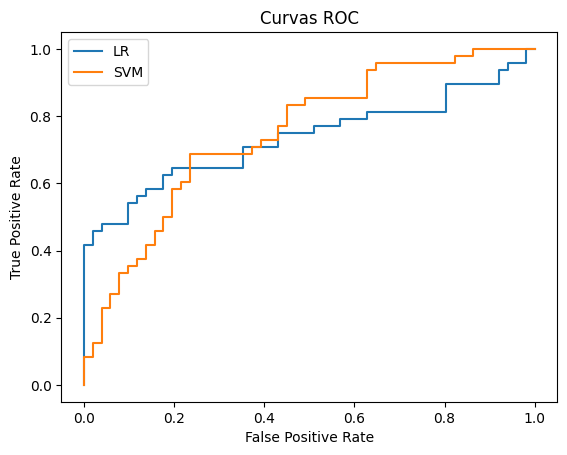

Tabla de Resultados:
Metricas       | LR              | SVM
--------------------------------------------------
Precisión      | 0.6140          | 0.6875
Sensibilidad   | 0.7292          | 0.6875
F-score        | 0.6667          | 0.6875
Exactitud      | 0.6465          | 0.6970
AUC            | 0.7341          | 0.7500

Matriz de confusión del mejor modelo (SVM):
[[36 15]
 [15 33]]


In [15]:
# Entrenar los modelos utilizando los datos de entrenamiento
logistic_regression_model.fit(X_train_selected, y_train)
svm_model.fit(X_train_selected, y_train)

# Evaluar su rendimiento sobre el conjunto de test
y_pred_lr = logistic_regression_model.predict(X_test_selected)
y_pred_svm = svm_model.predict(X_test_selected)

# Curvas AUC
y_proba_test_lr = logistic_regression_model.predict_proba(X_test_selected)
auc_lr = metrics.roc_auc_score(y_test, y_proba_test_lr[:, 1])
fpr_lr, tpr_lr, th_lr = metrics.roc_curve(y_test, y_proba_test_lr[:, 1])
y_proba_test_svm = svm_model.predict_proba(X_test_selected)
auc_svm = metrics.roc_auc_score(y_test, y_proba_test_svm[:, 1])
fpr_svm, tpr_svm, th_svm = metrics.roc_curve(y_test, y_proba_test_svm[:, 1])

# Mostrar la comparación de las curvas ROC
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend()
plt.show()

# Calcular métricas de evaluación
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
precision_svm = metrics.precision_score(y_test, y_pred_svm)
recall_lr = metrics.recall_score(y_test, y_pred_lr)
recall_svm = metrics.recall_score(y_test, y_pred_svm)
f1_lr = metrics.f1_score(y_test, y_pred_lr)
f1_svm = metrics.f1_score(y_test, y_pred_svm)

# Crear una tabla con los resultados obtenidos de los modelos
results_table = {
    'LR': [accuracy_lr, precision_lr, recall_lr, f1_lr, auc_lr],
    'SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, auc_svm]
}

# Mostrar la tabla
print("Tabla de Resultados:")
print("Metricas       | LR              | SVM")
print("--------------------------------------------------")
print("Precisión      | {:.4f}          | {:.4f}".format(results_table['LR'][1], results_table['SVM'][1]))
print("Sensibilidad   | {:.4f}          | {:.4f}".format(results_table['LR'][2], results_table['SVM'][2]))
print("F-score        | {:.4f}          | {:.4f}".format(results_table['LR'][3], results_table['SVM'][3]))
print("Exactitud      | {:.4f}          | {:.4f}".format(results_table['LR'][0], results_table['SVM'][0]))
print("AUC            | {:.4f}          | {:.4f}".format(results_table['LR'][4], results_table['SVM'][4]))

# Mostrar la matriz de confusión del mejor modelo
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
print("\nMatriz de confusión del mejor modelo (SVM):\n{}".format(conf_matrix))